# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [ ]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
# from getCitiBikeCSV import getCitiBikeCSV
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

%pylab inline

import os
puidata = os.getenv("PUIDATA")

#Modified to work in the home directory
if puidata is None:
#     os.environ["PUIDATA"] = "%s/Documents/CUSP/PUI/PUIdata"%os.getenv("HOME")
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print(os.getenv('PUIDATA'))

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
datestring = ['201501', '201507'] #get two month of citibike data
for i in datestring:
    getCitiBikeCSV(i)

file in place, you can continue
file in place, you can continue


In [3]:
ls = []
for i in datestring:
    temp = pd.read_csv(os.getenv("PUIDATA") + "/" + i + '-citibike-tripdata.csv')
    ls.append(temp)
df = pd.concat(ls)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [4]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [7]:
l = len(df.index)
df.index = range(l)

In [8]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

        

In [9]:
#dropping some data I no longer need
#... your code here...
# temp = df.drop(columns=['start station id', 'start station name', 'end station latitude',
#                   'end station longitude', 'end station id', 'end station name', 'end station latitude', 'bikeid'])
# station_ids = pd.read_json('https://feeds.citibikenyc.com/stations/stations.json')
# station_ids.drop(columns='executionTime', inplace=True)
# station_ids["stationBeanList"][0]
df.drop(columns=['end station longitude', 'end station id', 'end station name', 'end station latitude', 'bikeid'], inplace=True)

In [10]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id,start station latitude,start station longitude,birth year,gender,ageM,ageF
count,1.371228e+06,1.371228e+06,1.371228e+06,1.371228e+06,1.185235e+06,1.371228e+06,915016.000000,269104.000000
mean,9.024175e+02,4.573037e+02,4.073505e+01,-7.399114e+01,1.976248e+03,1.059800e+00,39.150142,37.375977
std,7.164578e+03,3.793511e+02,1.932016e-02,1.230989e-02,1.149466e+01,5.736944e-01,11.507655,11.216207
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.885000e+03,0.000000e+00,16.000000,16.000000
25%,3.910000e+02,3.060000e+02,4.072182e+01,-7.400017e+01,1.968000e+03,1.000000e+00,30.000000,29.000000
50%,6.240000e+02,4.140000e+02,4.073653e+01,-7.399076e+01,1.979000e+03,1.000000e+00,37.000000,34.000000
75%,1.031000e+03,4.920000e+02,4.075038e+01,-7.398195e+01,1.985000e+03,1.000000e+00,47.000000,45.000000
max,5.174309e+06,3.180000e+03,4.077152e+01,-7.395005e+01,1.999000e+03,2.000000e+00,130.000000,89.000000


In [11]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

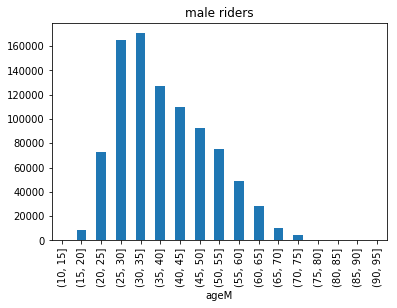

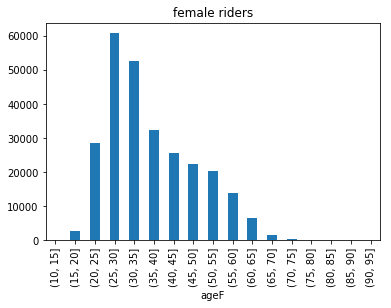

In [12]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.000972
(20, 25]       0.027474
(25, 30]       0.073334
(30, 35]       0.083313
(35, 40]       0.064725
(40, 45]       0.039582
(45, 50]       0.021917
(50, 55]       0.015446
(55, 60]       0.014146
(60, 65]       0.007732
(65, 70]       0.002714
(70, 75]       0.000214
(75, 80]       0.000206
(80, 85]       0.000006
(85, 90]       0.000022
(90, 95]            NaN


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


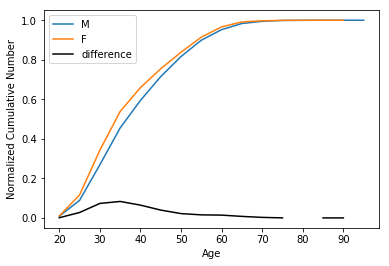

In [13]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [14]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [15]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.08396393052551743, pvalue=0.0)


**  FILL IN THE CELL BELOW!**

In [19]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function


## Answer
### scipy KS test returns the ks statistic on 2 samples and the two-tailed p value.

### The null hypothesis is that the distribution of the 2 samples are the same.

### If the K-S statistic is low or the p-value returned is high, then the null hypothesis cannot be rejected.

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [20]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
# Image(filename="../plotsforclasses/ks2sample_table.png")

# what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS


## Null Hypothesis
There is no statistical difference in the trip suration distribution of rides during day (t0) and rides at night (t1)

$H_0$: t0 = t1

## Alternative Hypothesis
The distribution of trip duration of bikers is not statistical the same during the day (t0) and during the night (t1)

$H_1$: t0 != t1

## Significance level = 0.05

In [17]:
#K-S test for the entire dataset

day_night = df[['tripduration', 'date']]
# define day time as 5:00am to 6:59pm (5:00 ~ 18:59)
#        night time as 7:00pm to 64:59am (19:00 ~ 4:59)
day = day_night['tripduration'][(df['date'].dt.hour > 5) & (df['date'].dt.hour < 19)]
night = day_night['tripduration'][(df['date'].dt.hour < 5) | (df['date'].dt.hour > 19)]
day.dropna(inplace=True)
night.dropna(inplace=True)
ks = scipy.stats.ks_2samp(day, night)
print(ks)

Ks_2sampResult(statistic=0.02299822099719595, pvalue=4.253518119800158e-79)


# Summary

The returned p value is less than the significance level

Therefore the null hypothesis can be rejected

In [29]:
#K-S test with a subset of 200

random.seed(0)
day_sample = np.random.choice(day, len(day.index)//200, replace= False)
night_sample = np.random.choice(night, len(night.index)//200, replace= False)
ks = scipy.stats.ks_2samp(day_sample, night_sample)
print(ks)

Ks_2sampResult(statistic=0.06343577008639867, pvalue=0.0019289821922141225)


# Summary

The returned p value is less than the significance level

Therefore the null hypothesis can be rejected

However, the k-s statistic for the reduced sample is higher than the k-s statistic for the entire dataset

I believe this is caused by the sudo randomness of the sampling method, not all of the population's characteristics are reflected in the samples

## Null Hypothesis
The distribution of the age of bikers is the same for the trips originating from Manhattan (a0) as those originating from Brooklyn (a1)

$H_0$: a0 = a1

## Alternative Hypothesis
The distribution of the age of bikers is not the same for the trips originating from Manhattan (a0) as those originating from Brooklyn (a1)

$H_1$: a0 != a1

## Significance level = 0.05

In [21]:
#k-s test for the entire dataset
#roughly estimate whether the station is in brooklyn or manhanttan by coordinates, based on https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
#   Such estimation will cause some stations to be miss-clssified which will reduce the reliability of the dataset and the result
age_bk = 2015 - df['birth year'][(df['start station latitude'] > 40.5820879767934) & (df['start station latitude'] < 40.739114772522505)\
                                 & (df['start station longitude'] < -73.86706149472118) & (df['start station longitude'] > -73.9543955417807)]
age_mah = 2015 - df['birth year'][(df['start station latitude'] > 40.68449147254294) & (df['start station latitude'] < 40.8757525041926)\
                                  & (df['start station longitude'] < -73.90665099539478) & (df['start station longitude'] > -74.01092841268031)]
age_bk.dropna(inplace=True)
age_mah.dropna(inplace=True)
ks = scipy.stats.ks_2samp(age_bk, age_mah)
print(ks)

Ks_2sampResult(statistic=0.12985991195134994, pvalue=2.579980620796666e-35)


# Summary
The returned p value is less than the significance level

Therefore the null hypothesis can be rejected

In [57]:
#K-S test with a subset of 200
random.seed(0)
bk_sample = np.random.choice(age_bk, len(age_bk.index)//200, replace= False)
mah_sample = np.random.choice(age_mah, len(age_mah.index)//200, replace= False)
ks = scipy.stats.ks_2samp(bk_sample, mah_sample)
print(ks)

Ks_2sampResult(statistic=0.1994296026554092, pvalue=0.7255966370641348)


# Summary
The returned p value is larger than the significance level

Therefore the null hypothesis cannot be rejected

However, the k-s statistic for the reduced sample is higher than the k-s statistic for the entire dataset

I believe this is caused by the sudo randomness of the sampling method, not all of the population's characteristics are reflected in the samples

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



# Null Hypothesis
There is no correlation between trip duration and the time of the day

In [60]:
random.seed(0)
bk_sample = np.random.choice(age_bk, 2000, replace= False)
mah_sample = np.random.choice(age_mah, 2000, replace= False)
day_sample = np.random.choice(day, 2000, replace= False)
night_sample = np.random.choice(night, 2000, replace= False)

In [61]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

dt = sorted(day_sample)
nt = sorted(night_sample)
p1 = scipy.stats.pearsonr(dt, nt)
print(p1)

(0.5870283617614688, 1.4822674897099645e-185)


# Summary
The result shows that trip duration and the time of the day are strongly correlated, therefore we can reject the null hypothesis

# Null Hypothesis
The age of bikers has no correlation with whether they start their trip in Manhanttan or Brooklyn

In [62]:
bt = sorted(bk_sample)
mt = sorted(mah_sample)
p2 = scipy.stats.pearsonr(bt, mt)
print(p2)

(0.9878188087379383, 0.0)


# Summary
The result shows that a0 and a1 are strongly correlated, therefore we can reject the null hypothesis

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

# Null Hypothesis
The trip duration of bikers same during the day (t0) and during the night (t1) are not correlated

In [63]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

sp1 = scipy.stats.spearmanr(a=day_sample, b=night_sample)
print(sp1)

SpearmanrResult(correlation=-0.01969235965286941, pvalue=0.37874887929331524)


# Summary
The result represents a very weak correlation between t0 and t1, but the returned p value is greater than significance level, therefore we cannot reject the null hypothesis

# Null Hypothesis
The age of bikers has no correlation with whether they start their trip in Manhanttan or Brooklyn

In [64]:
sp2 = scipy.stats.spearmanr(a=bk_sample, b=mah_sample)
print(sp2)

SpearmanrResult(correlation=-0.008056427675862827, pvalue=0.7187910528742631)


# Summary
The result represents a very weak correlation bewteen a0 and a1, but the returned p value is greater than significance level, therefore we cannot reject the null hypothesis

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**